# Intel MPI Benchmarks

Results of selected MPI1 tests from the [IMB benchmark suite](https://software.intel.com/content/www/us/en/develop/documentation/imb-user-guide/top.html).

Single transfer (2x processes communicate):
- pingpong

Parallel-transfer tests (more than 2 processes communicate):
- uniband: processes communicate in pairs split between 1st and 2nd half of ranks
- biband: As for uniband but communication initiated in both directions

All tests measure latency and bandwidth for a range of message sizes.


In [38]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../reframe', '..')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Bandwidth/latency vs message size - 2x processes

The plots below show results from most-recent run of each 2x process test for each system/partition/environment combination.

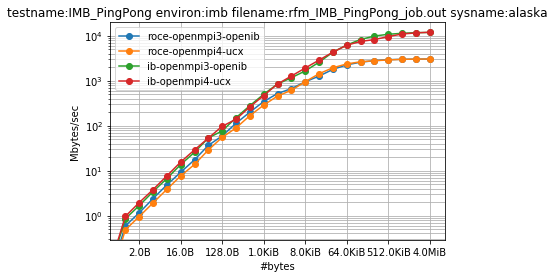

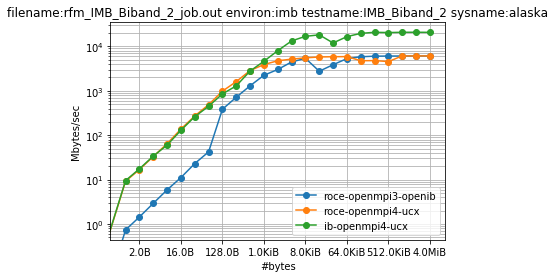

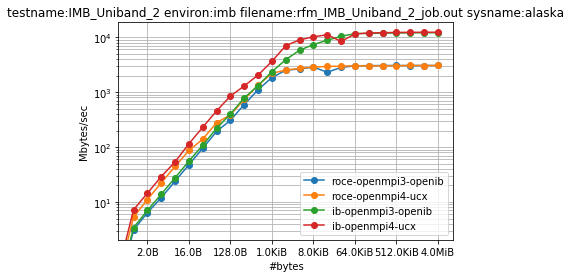

In [43]:
for test in ['IMB_PingPong', 'IMB_Biband_2', 'IMB_Uniband_2']:
    
    # find all data and work out differences between them:
    paths = modules.utils.find_run_outputs(root='../output', test=test)
    fig, ax = plt.subplots(nrows=1, ncols=1)
    common, meta_diffs = modules.utils.diff_dicts([modules.utils.parse_path_metadata(p) for p in paths], ignore=['path'])
    
    # load and plot:
    for ix, path in enumerate(paths):
        data = modules.imb.read_imb_out(path)
        label = '-'.join(meta_diffs[ix].values())
        plt.plot(data['#bytes'], data['Mbytes/sec'], 'o-', data=data, label=label)
    # TODO: need to add latency plots for IMB_PingPong
        
    # format plot:
    ax.set_xscale('log', basex=2)
    ax.set_yscale('log', basey=10)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: modules.utils.sizeof_fmt(x)))
    ax.grid(True, which="both")
    ax.set_xlabel('#bytes')
    ax.set_ylabel('Mbytes/sec')
    title = ' '.join(['%s:%s' % (k, v) for (k, v) in common.items()]) # TODO: improve
    ax.set_title(title)
    ax.legend()

# Bandwidth vs Number of Processes

The plots below are for the most-recent test on each system/partition/environment combination. They show the bandwidth vs number of processes for the  parallel transfer tests.

In each case all tests were run on two nodes.

IMB_Uniband:


case,alaska-ib-openmpi3-openib-imb,alaska-ib-openmpi4-ucx-imb,alaska-roce-openmpi3-openib-imb,alaska-roce-openmpi4-ucx-imb
n_procs,,,,
2,12074.37,12315.67,3058.41,3061.18
4,12339.13,12373.42,11742.43,10703.41
8,20860.60,20593.56,19663.30,21073.79
16,43983.39,40622.61,42350.37,40901.35
32,84208.57,73842.92,82845.55,73891.00
64,154856.65,121047.00,140733.41,116240.25


IMB_Biband:


case,alaska-ib-openmpi4-ucx-imb,alaska-roce-openmpi3-openib-imb,alaska-roce-openmpi4-ucx-imb
n_procs,,,
2,20850.49,6111.71,6114.30
4,20337.72,17790.22,19352.17
8,37862.72,35158.37,39011.59
16,70345.45,66463.01,69416.51
32,142555.08,124755.72,140581.14
64,205438.31,209381.33,217848.14


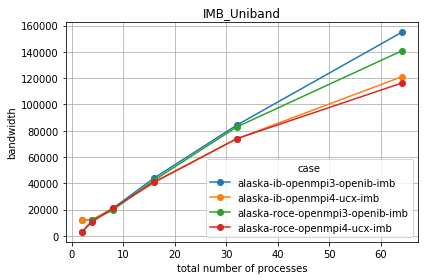

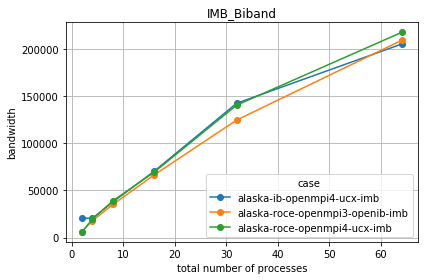

In [62]:
# TODO: Add max bandwidth vs n-process plots

for test in ['IMB_Uniband', 'IMB_Biband']:
    
    # load perf records:
    perf_records = modules.utils.load_perf_logs('../perflogs', test, '.log')
    
    # calculate number of processes (=tasks):
    perf_records['n_procs'] = [int(tn.rsplit('_')[-1]) for tn in perf_records['testname']]
    
    # plot/tabulate:
    table = modules.plots.tabulate_last_perf_vs(perf_records, 'n_procs', 'bandwidth')
    ax = table.plot(grid=True, style='o-')
    ax.set_xlabel('total number of processes')
    ax.set_ylabel('bandwidth')
    ax.set_title(test)
    plt.tight_layout()
    print('%s:' % test)
    display(HTML(table.to_html()))


# Performance History

The plots below show all performance variables (i.e. maximum/minimum values) for all tests in the repository, grouped by system/partition/environment.

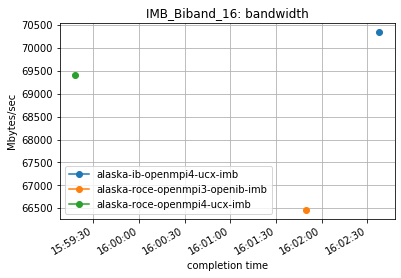

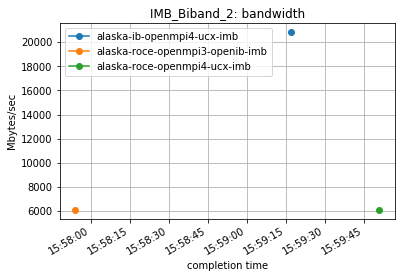

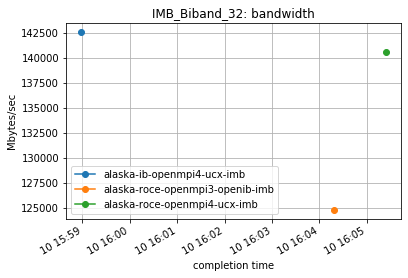

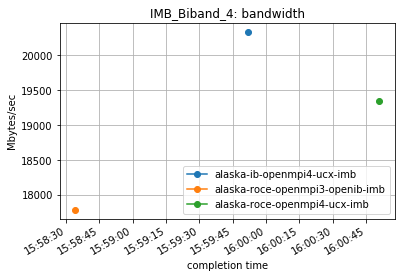

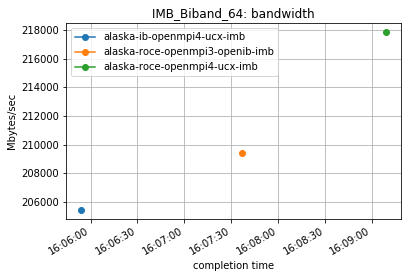

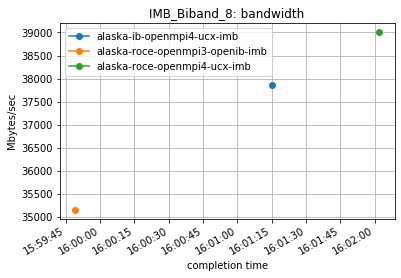

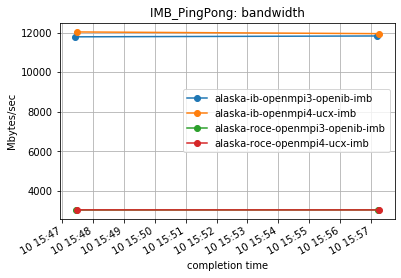

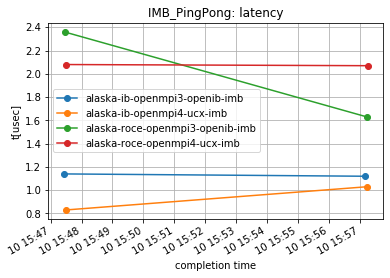

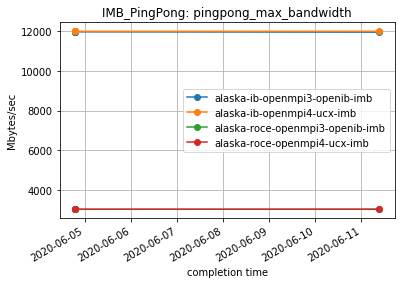

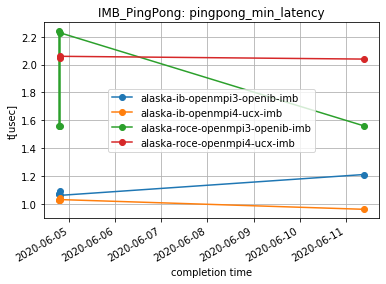

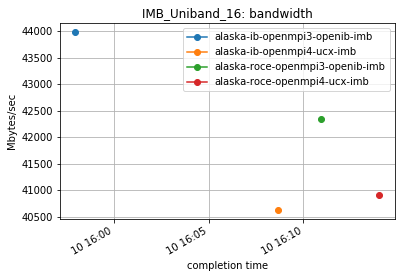

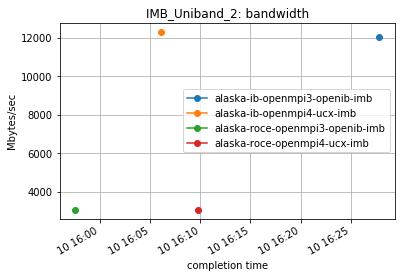

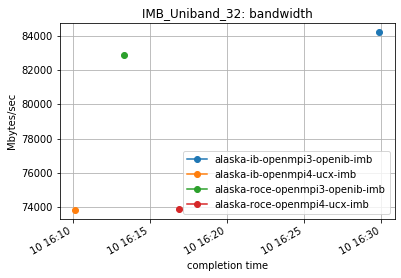

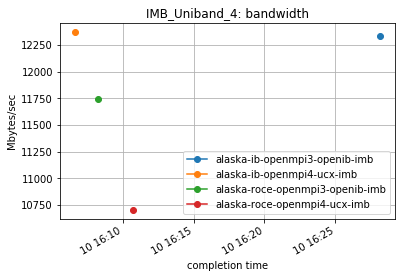

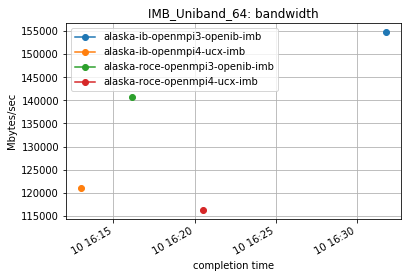

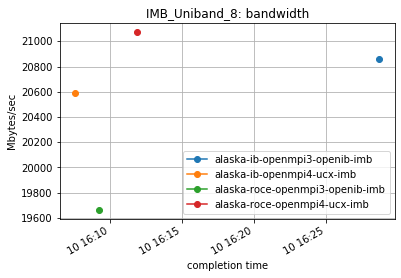

In [63]:
# Plot performance history:
perf_records = modules.utils.load_perf_logs('../perflogs', "IMB_", '.log')
modules.plots.plot_perf_history(perf_records)